In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

Average Scores:
Score    0.443937
q1       0.154681
q2       0.300647
q3       0.397334
dtype: float64
Test Spearman's rank correlation coefficient = 0.4829


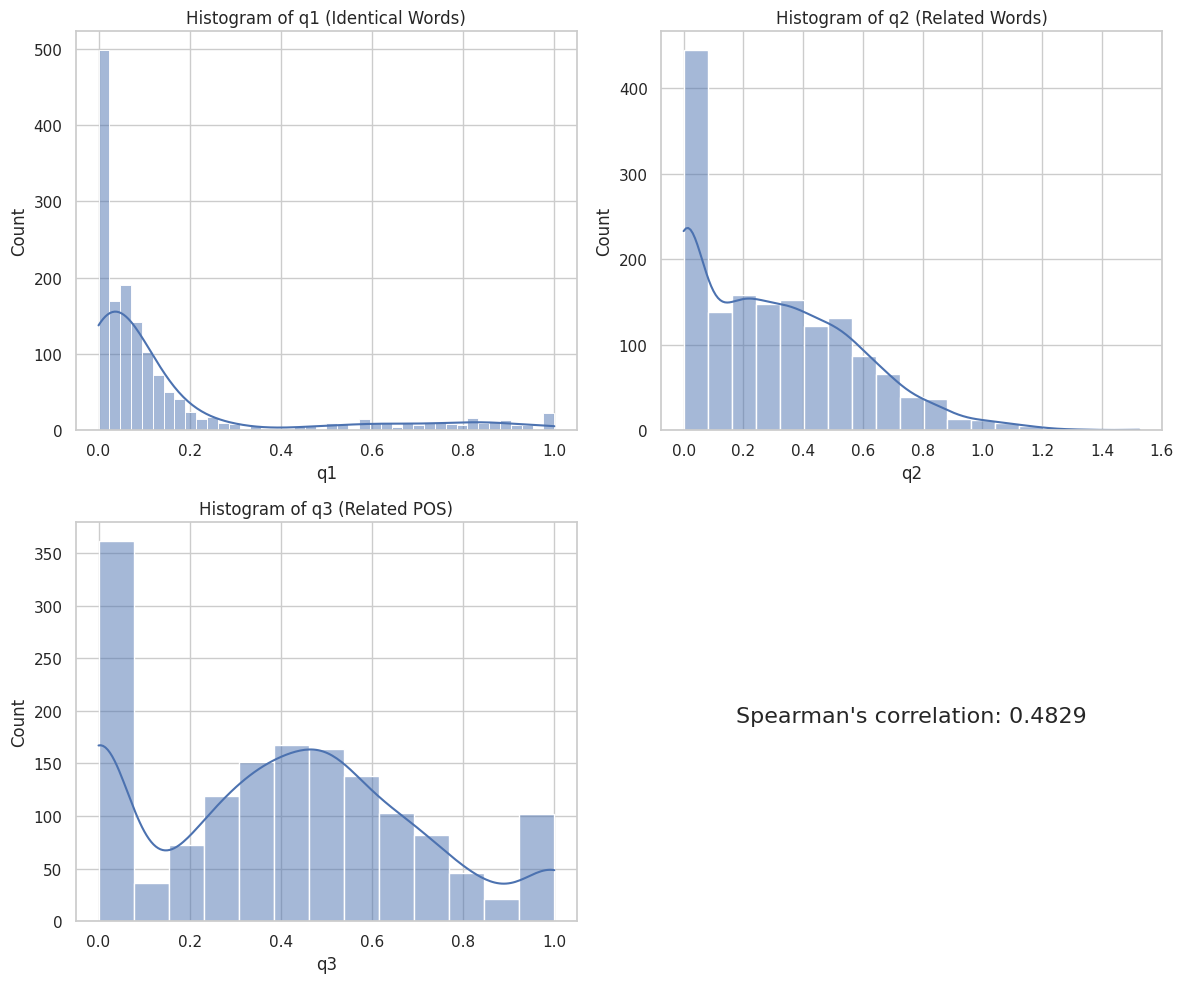

In [5]:
# Load the training dataset
train_df = pd.read_csv("/content/esp_train.csv")

# Preprocess the dataset
train_df['Text'] = train_df['Text'].str.lower()

# Convert 'Score' column to numeric
train_df['Score'] = pd.to_numeric(train_df['Score'], errors='coerce')  # Convert non-numeric values to NaN

# Define the function to calculate linguistic features
def calculate_linguistic_features(text):
    sentences = text.split('.')
    if len(sentences) >= 2:
        sentence1 = sentences[0]
        sentence2 = sentences[1]

        words_sentence1 = set(sentence1.split())
        words_sentence2 = set(sentence2.split())

        # Q1: Identical Words (Lexical Overlap)
        q1 = len(words_sentence1 & words_sentence2) / len(words_sentence1 | words_sentence2)

        # Q2: Related Words
        q2 = sum(1 for word1 in words_sentence1 for word2 in words_sentence2 if word1.lower() in word2.lower() or word2.lower() in word1.lower()) / (len(words_sentence1) + len(words_sentence2))

        # Q3: Related Words of the Same Part of Speech
        tagged_sentence1 = pos_tag(word_tokenize(sentence1))
        tagged_sentence2 = pos_tag(word_tokenize(sentence2))

        pos_tags_sentence1 = set([pos for word, pos in tagged_sentence1])
        pos_tags_sentence2 = set([pos for word, pos in tagged_sentence2])

        q3 = len(pos_tags_sentence1 & pos_tags_sentence2) / len(pos_tags_sentence1 | pos_tags_sentence2)

        return q1, q2, q3
    else:
        return 0, 0, 0

# Calculate linguistic features for the training dataset
train_df['q1'], train_df['q2'], train_df['q3'] = zip(*train_df['Text'].apply(calculate_linguistic_features))

# Add Average Scores
avg_scores = train_df[['Score', 'q1', 'q2', 'q3']].mean()
print("Average Scores:")
print(avg_scores)

# Split the dataset into features (X) and target variable (y)
X = train_df[['q1', 'q2', 'q3']]
y = train_df['Score']

# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Spearman's rank correlation coefficient
test_spearman = spearmanr(y_test, y_pred)[0]
print(f"Test Spearman's rank correlation coefficient = {test_spearman:.4f}")

# Plotting q1, q2, q3 on histograms along with total Spearman's correlation
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(train_df['q1'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of q1 (Identical Words)')

sns.histplot(train_df['q2'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of q2 (Related Words)')

sns.histplot(train_df['q3'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of q3 (Related POS)')

axes[1, 1].text(0.5, 0.5, f"Spearman's correlation: {test_spearman:.4f}", ha='center', fontsize=16)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [7]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.3 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=684dcd0602f3f88e1bb4eead11d2ec2ae50d8fe67126e58abc66054862464bd6
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

rust_model.ot:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/539M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/528 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

Average Scores:
Score             0.443937
q1                0.154681
q2                0.300647
q3                0.397334
Mean_Embedding    0.000861
Min_Embedding    -0.119467
Max_Embedding     0.123584
dtype: float64
Test Spearman's rank correlation coefficient = 0.5207


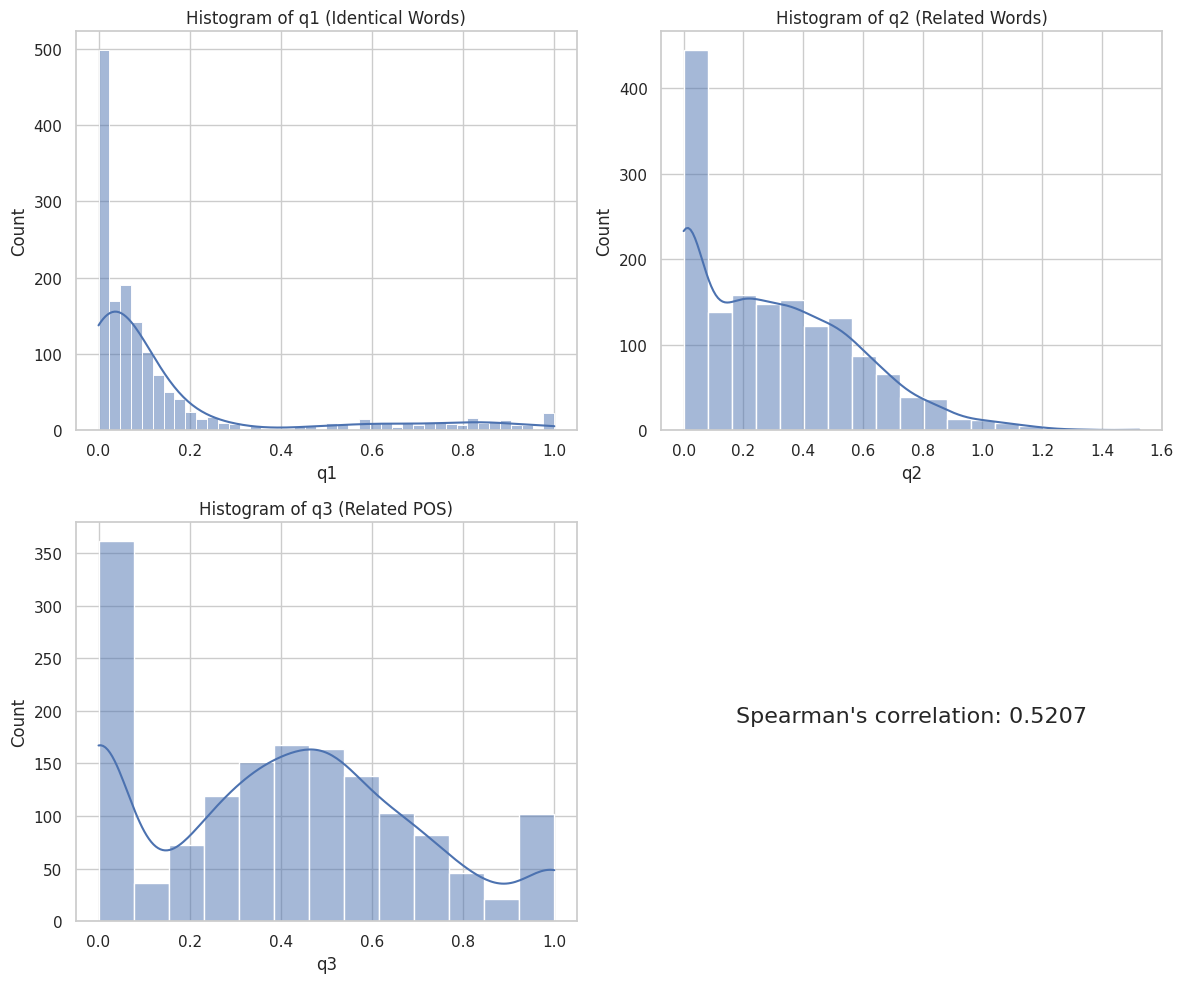

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

# Load the training dataset
train_df = pd.read_csv("/content/esp_train.csv")

# Preprocess the dataset
train_df['Text'] = train_df['Text'].str.lower()

# Convert 'Score' column to numeric
train_df['Score'] = pd.to_numeric(train_df['Score'], errors='coerce')  # Convert non-numeric values to NaN

# Define the function to calculate linguistic features
def calculate_linguistic_features(text):
    sentences = text.split('.')
    if len(sentences) >= 2:
        sentence1 = sentences[0]
        sentence2 = sentences[1]

        words_sentence1 = set(sentence1.split())
        words_sentence2 = set(sentence2.split())

        # Q1: Identical Words (Lexical Overlap)
        q1 = len(words_sentence1 & words_sentence2) / len(words_sentence1 | words_sentence2)

        # Q2: Related Words
        q2 = sum(1 for word1 in words_sentence1 for word2 in words_sentence2 if word1.lower() in word2.lower() or word2.lower() in word1.lower()) / (len(words_sentence1) + len(words_sentence2))

        # Q3: Related Words of the Same Part of Speech
        tagged_sentence1 = pos_tag(word_tokenize(sentence1))
        tagged_sentence2 = pos_tag(word_tokenize(sentence2))

        pos_tags_sentence1 = set([pos for word, pos in tagged_sentence1])
        pos_tags_sentence2 = set([pos for word, pos in tagged_sentence2])

        q3 = len(pos_tags_sentence1 & pos_tags_sentence2) / len(pos_tags_sentence1 | pos_tags_sentence2)

        return q1, q2, q3
    else:
        return 0, 0, 0

# Calculate linguistic features for the training dataset
train_df['q1'], train_df['q2'], train_df['q3'] = zip(*train_df['Text'].apply(calculate_linguistic_features))

# Use SentenceTransformer to generate embeddings and extract linguistic features
model = SentenceTransformer('distiluse-base-multilingual-cased')
train_df['Sentence_Embeddings'] = train_df['Text'].apply(lambda text: model.encode(text))

# Perform calculations on embeddings
def calculate_embedding_features(embeddings):
    # Example: You can perform calculations on embeddings here to derive your linguistic features
    # For illustration, let's compute the mean, min, and max of embeddings
    mean_embedding = embeddings.mean()
    min_embedding = embeddings.min()
    max_embedding = embeddings.max()
    return mean_embedding, min_embedding, max_embedding

# Calculate linguistic features based on embeddings
train_df['Mean_Embedding'], train_df['Min_Embedding'], train_df['Max_Embedding'] = zip(*train_df['Sentence_Embeddings'].apply(calculate_embedding_features))

# Add Average Scores
avg_scores = train_df[['Score', 'q1', 'q2', 'q3', 'Mean_Embedding', 'Min_Embedding', 'Max_Embedding']].mean()
print("Average Scores:")
print(avg_scores)

# Split the dataset into features (X) and target variable (y)
X = train_df[['q1', 'q2', 'q3', 'Mean_Embedding', 'Min_Embedding', 'Max_Embedding']]
y = train_df['Score']

# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Spearman's rank correlation coefficient
test_spearman = spearmanr(y_test, y_pred)[0]
print(f"Test Spearman's rank correlation coefficient = {test_spearman:.4f}")

# Plotting q1, q2, q3 on histograms along with total Spearman's correlation
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(train_df['q1'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of q1 (Identical Words)')

sns.histplot(train_df['q2'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of q2 (Related Words)')

sns.histplot(train_df['q3'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of q3 (Related POS)')

axes[1, 1].text(0.5, 0.5, f"Spearman's correlation: {test_spearman:.4f}", ha='center', fontsize=16)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from nltk.tokenize import word_tokenize
from nltk import pos_tag

Average Scores:
Score             0.443937
q1                0.154681
q2                0.300647
q3                0.397334
Mean_Embedding    0.000861
Min_Embedding    -0.119467
Max_Embedding     0.123584
dtype: float64
Test Spearman's rank correlation coefficient = 0.5146


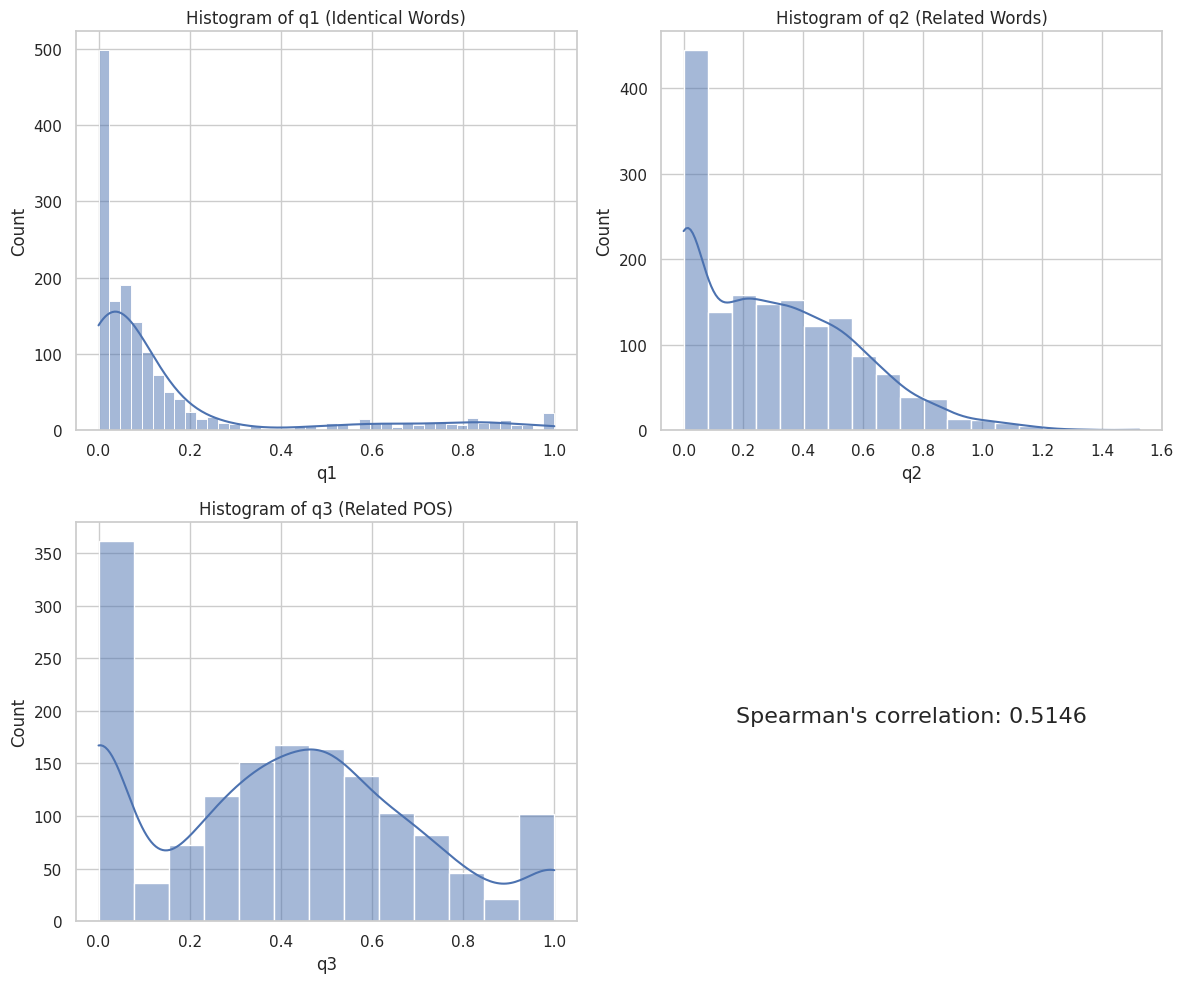

Best Parameters:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


In [10]:
# Load the training dataset
train_df = pd.read_csv("/content/esp_train.csv")

# Preprocess the dataset
train_df['Text'] = train_df['Text'].str.lower()
train_df['Score'] = pd.to_numeric(train_df['Score'], errors='coerce')  # Convert non-numeric values to NaN

# Define the function to calculate linguistic features
def calculate_linguistic_features(text):
    sentences = text.split('.')
    if len(sentences) >= 2:
        sentence1 = sentences[0]
        sentence2 = sentences[1]

        words_sentence1 = set(sentence1.split())
        words_sentence2 = set(sentence2.split())

        # Q1: Identical Words (Lexical Overlap)
        q1 = len(words_sentence1 & words_sentence2) / len(words_sentence1 | words_sentence2)

        # Q2: Related Words
        q2 = sum(1 for word1 in words_sentence1 for word2 in words_sentence2 if word1.lower() in word2.lower() or word2.lower() in word1.lower()) / (len(words_sentence1) + len(words_sentence2))

        # Q3: Related Words of the Same Part of Speech
        tagged_sentence1 = pos_tag(word_tokenize(sentence1))
        tagged_sentence2 = pos_tag(word_tokenize(sentence2))

        pos_tags_sentence1 = set([pos for word, pos in tagged_sentence1])
        pos_tags_sentence2 = set([pos for word, pos in tagged_sentence2])

        q3 = len(pos_tags_sentence1 & pos_tags_sentence2) / len(pos_tags_sentence1 | pos_tags_sentence2)

        return q1, q2, q3
    else:
        return 0, 0, 0

# Calculate linguistic features for the training dataset
train_df['q1'], train_df['q2'], train_df['q3'] = zip(*train_df['Text'].apply(calculate_linguistic_features))

# Use SentenceTransformer to generate embeddings and extract linguistic features
model = SentenceTransformer('distiluse-base-multilingual-cased')
train_df['Sentence_Embeddings'] = train_df['Text'].apply(lambda text: model.encode(text))

# Perform calculations on embeddings
def calculate_embedding_features(embeddings):
    mean_embedding = embeddings.mean()
    min_embedding = embeddings.min()
    max_embedding = embeddings.max()
    return mean_embedding, min_embedding, max_embedding

# Calculate linguistic features based on embeddings
train_df['Mean_Embedding'], train_df['Min_Embedding'], train_df['Max_Embedding'] = zip(*train_df['Sentence_Embeddings'].apply(calculate_embedding_features))

# Add Average Scores
avg_scores = train_df[['Score', 'q1', 'q2', 'q3', 'Mean_Embedding', 'Min_Embedding', 'Max_Embedding']].mean()
print("Average Scores:")
print(avg_scores)

# Split the dataset into features (X) and target variable (y)
X = train_df[['q1', 'q2', 'q3', 'Mean_Embedding', 'Min_Embedding', 'Max_Embedding']]
y = train_df['Score']

# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator for prediction
y_pred = best_estimator.predict(X_test)

# Calculate Spearman's rank correlation coefficient
test_spearman = spearmanr(y_test, y_pred)[0]
print(f"Test Spearman's rank correlation coefficient = {test_spearman:.4f}")

# Plotting q1, q2, q3 on histograms along with total Spearman's correlation
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(train_df['q1'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of q1 (Identical Words)')

sns.histplot(train_df['q2'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of q2 (Related Words)')

sns.histplot(train_df['q3'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of q3 (Related POS)')

axes[1, 1].text(0.5, 0.5, f"Spearman's correlation: {test_spearman:.4f}", ha='center', fontsize=16)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Print the best parameters found during grid search
print("Best Parameters:")
print(best_params)
